In [17]:
import numpy as np
import scipy.optimize as fit
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd 

In [18]:
file = pd.read_csv("90degelizabeth1.csv")
tx, aydata, Fdata= np.loadtxt("90degelizabeth1.csv", delimiter=",", skiprows=1, usecols=(0,2,4), unpack=True)

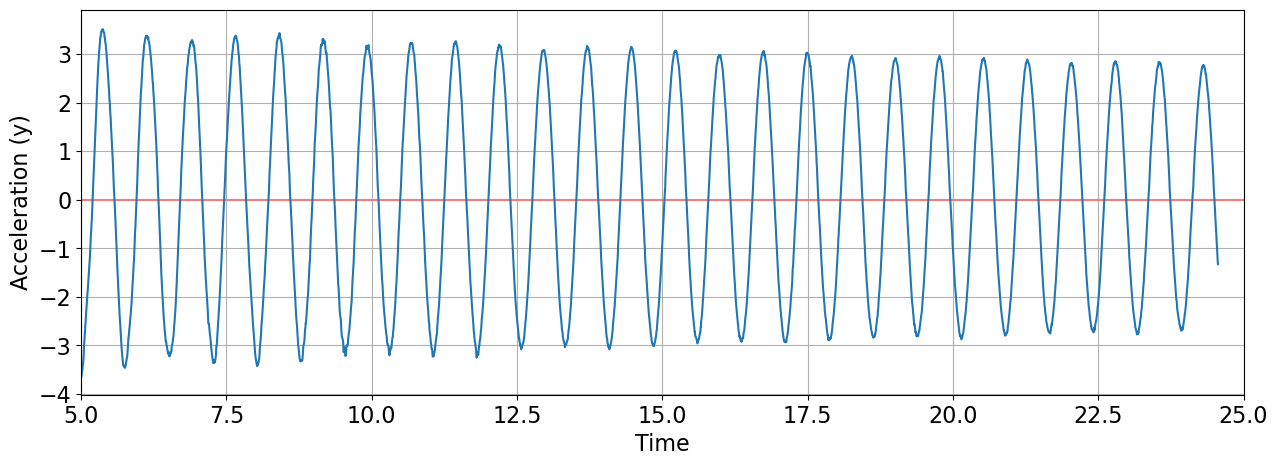

In [19]:
plt.figure(figsize=(15, 5))
plt.axhline(y=-0, color="lightcoral")
plt.plot(file["Time (s)"], file["Ay (m/s²)"]+9.81)
plt.xlim(5, 25)
plt.xlabel("Time")
plt.ylabel("Acceleration (y)")
plt.grid()
plt.show()

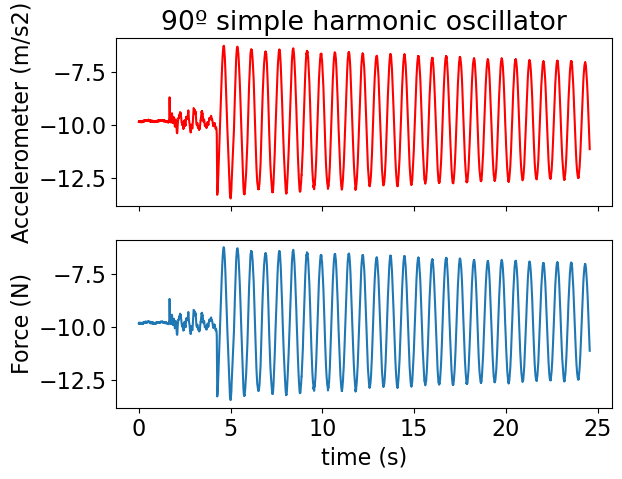

In [20]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(tx, aydata,'r', label="accelerometer")
axs[0].set_title('90º simple harmonic oscillator')
axs[0].set_ylabel('Accelerometer (m/s2)')
axs[1].plot(tx, aydata)
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('Force (N)')
plt.show()

In [21]:
# data interpolation
yinterp = interp1d(tx, aydata, kind="linear")

start_time = 5
stop_time = 24
step_size = 0.005
tvals = np.arange(start_time, stop_time, step_size)  
yvals = yinterp(tvals)

In [22]:
# simple harmonic motion model
# acceleration 
def simple_a(t, A, B, w, phi):                  
    return B - A * (w ** 2) * np.cos(w * t + phi)

# position
def simple_y(t, A, B, w, phi):
    return B + A * np.cos(w * t + phi)

# inital values 
Ainit, Binit, winit, phiinit, betainit = (0.1, -10, 8, 1, 0)
start_params = (Ainit, Binit, winit, phiinit)

array([[ 4.44073238e-02,  5.03017259e-05],
       [-9.77806290e+00,  2.45187473e-03],
       [ 8.29979891e+00,  2.07701259e-04],
       [-4.42347714e-02,  2.27171289e-03]])

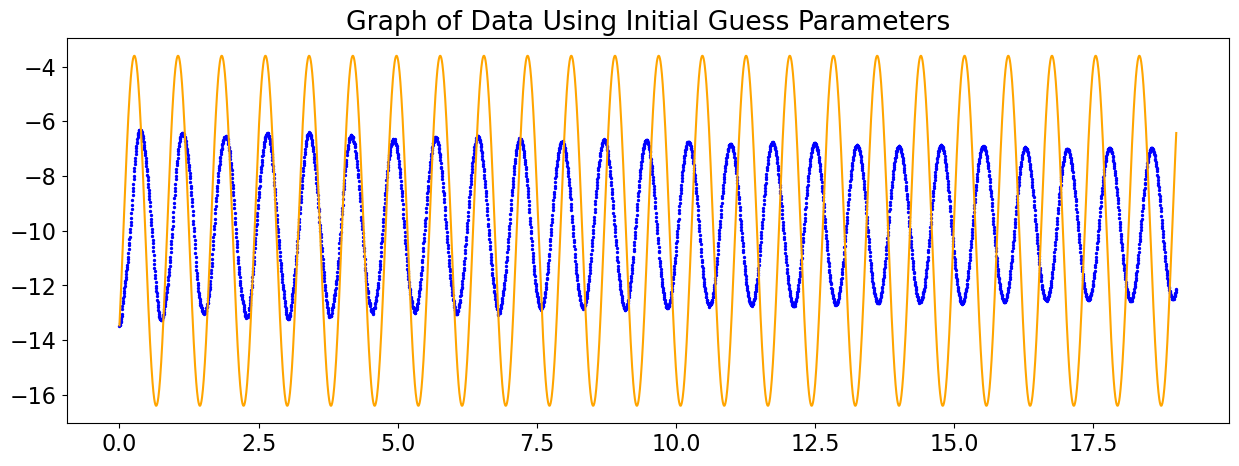

In [23]:
# fitting initial guesses
params, cov = fit.curve_fit(simple_a, tvals-start_time, yvals, p0=start_params)
(A, B, w, phi) = params

std_errs = np.sqrt(np.diag(cov))
(A_err, B_err, w_err, phi_err) = std_errs
display(np.transpose([params, std_errs]))

ypred = simple_a(tvals-start_time, A, B, w, phi)

# graph
plt.figure(figsize=(15,5))
plt.plot(tvals-start_time, simple_a(tvals-start_time, Ainit, Binit, winit, phiinit), color='orange')
plt.scatter(tvals-start_time, yvals, c="b", s=2)
plt.title("Graph of Data Using Initial Guess Parameters")
plt.show()

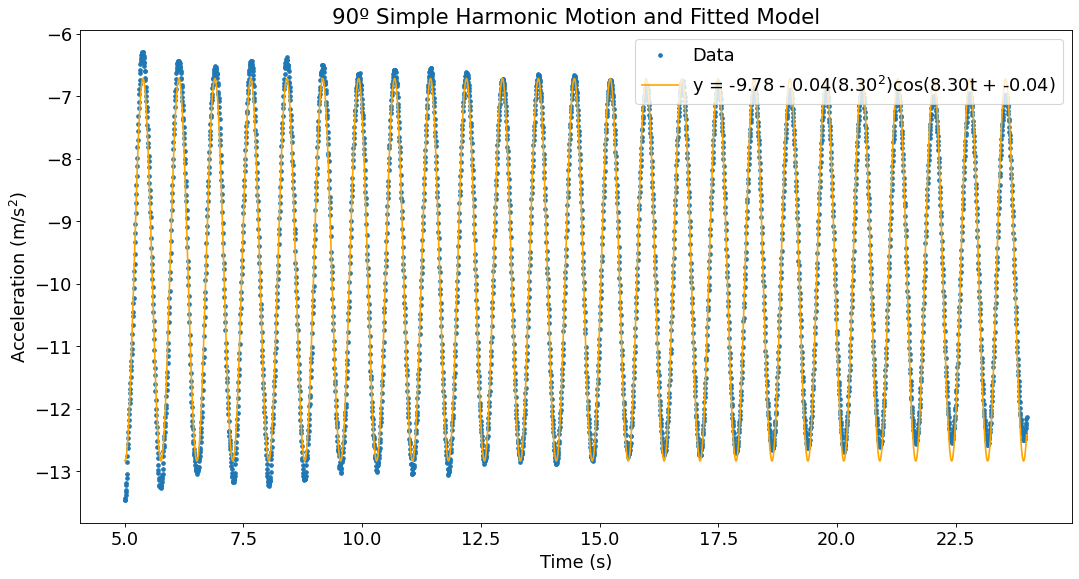

A = 0.04 
B = -9.78 
w = 8.30 
phi = -0.04


In [24]:
# best fit plot simple harmonic motion
fig1 = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

plt.scatter(tvals, yvals, s=10, label="Data")
plt.plot(tvals, ypred, color='orange', label=f"y = {B:.2f} - {A:.2f}({w:.2f}$^2$)cos({w:.2f}t + {phi:.2f})")

plt.title("90º Simple Harmonic Motion and Fitted Model")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s$^2$)")
plt.legend(loc="upper right")
plt.show()

print(f"A = {A:.2f} \nB = {B:.2f} \nw = {w:.2f} \nphi = {phi:.2f}")

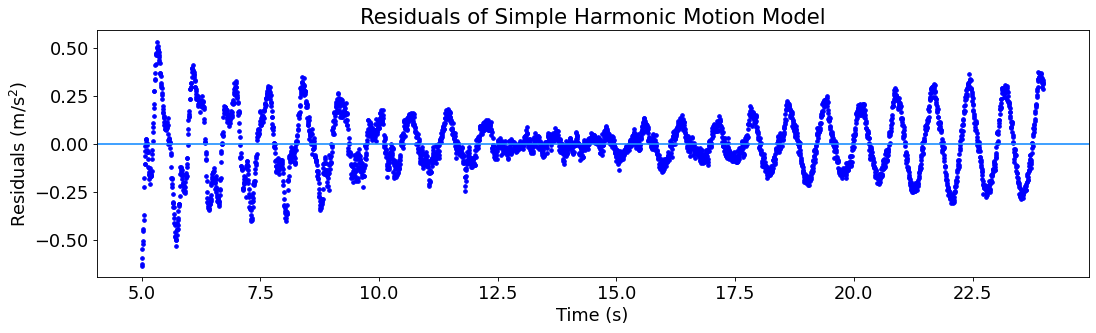

In [25]:
# redisuals 
residuals = yvals - ypred
fig2b = plt.figure(figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({"font.size": 16})

plt.axhline(0, color="dodgerblue")
plt.scatter(tvals, residuals, color='blue', s=10)

plt.title("Residuals of Simple Harmonic Motion Model")
plt.xlabel("Time (s)")
plt.ylabel("Residuals (m/s$^2$)")
plt.show()

In [26]:
# calculate k
m = 0.2
k = m * w ** 2 
k

13.777332402559049

In [27]:
# k error
m_err = 0.001
k_err = k * np.sqrt(4 * (w_err / w) ** 2 + (m_err / m) ** 2)
k_err

0.06889011311137676

In [28]:
# agreement test
print(np.abs(k - 12))
print(2 * np.sqrt(1.2 ** 2 + k_err ** 2))
np.abs(k - 12) < 2 * np.sqrt(1.2 ** 2 + k_err ** 2)

1.7773324025590487
2.403951619882978


True

In [29]:
# damped harmonic motion model
# acceleration 
def vdamped_a(t, A, B, w, phi, beta):
    return B + A * np.exp(-beta*t) * ((beta**2-w**2)*np.cos(w*t + phi)+2*beta*w*np.sin(w*t+phi))

In [30]:
# curve fit
start_params = (Ainit, Binit, winit, phiinit, betainit)
params, cov = fit.curve_fit(vdamped_a, tvals-start_time, yvals, p0=start_params)
[A, B, w, phi, beta] = params

std_errs = np.sqrt(np.diag(cov))
(A_err, B_err, w_err, phi_err, beta_err) = std_errs
print(np.transpose([params, std_errs]))

ypred = vdamped_a(tvals-start_time, A, B, w, phi, beta) 

[[ 4.95716184e-02  3.95264171e-05]
 [-9.77904163e+00  9.13725530e-04]
 [ 8.29968456e+00  7.75857572e-05]
 [-4.55179612e-02  8.00855923e-04]
 [ 1.17735178e-02  7.68340723e-05]]


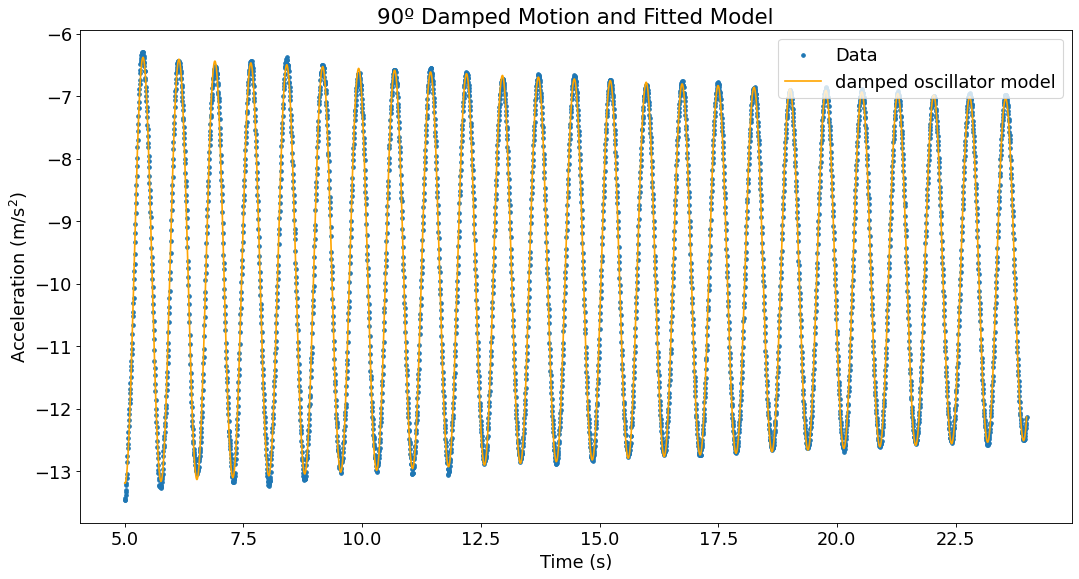

A = 0.05 
B = -9.78 
w = 8.30 
phi = -0.05 
beta = 0.01


In [31]:
fig1 = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

plt.scatter(tvals, yvals, s=10, label="Data")
plt.plot(tvals, ypred, color='orange', label="damped oscillator model")

plt.title("90º Damped Motion and Fitted Model")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s$^2$)")
plt.legend(loc="upper right")
plt.show()

print(f"A = {A:.2f} \nB = {B:.2f} \nw = {w:.2f} \nphi = {phi:.2f} \nbeta = {beta:.2f}")

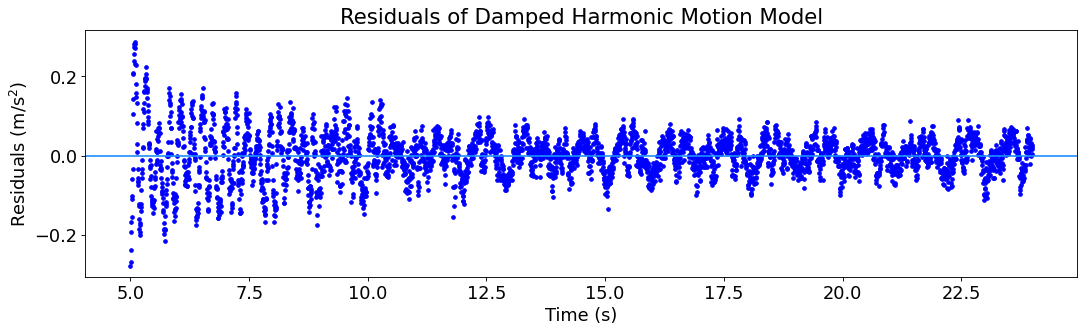

In [32]:
# redisuals 
residuals = yvals - ypred
fig2b = plt.figure(figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({"font.size": 16})

plt.axhline(0, color="dodgerblue")
plt.scatter(tvals, residuals, color='blue', s=10)

plt.title("Residuals of Damped Harmonic Motion Model")
plt.xlabel("Time (s)")
plt.ylabel("Residuals (m/s$^2$)")
plt.show()

In [33]:
# k error 
k_err = k * np.sqrt(4 * (w_err / w) ** 2 + (m_err / m) ** 2)
k_err

0.06888714358836026